In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st
import seaborn as sns

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasing,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299


19558
2
178.5
2145.484375
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
company_name    64 non-null object
trips_amount    64 non-null int64
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


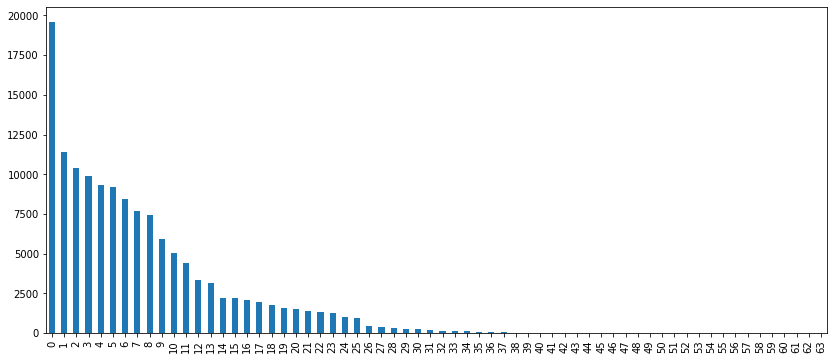

In [2]:
df_companies = pd.read_csv('/datasets/project_sql_result_01.csv')
display(df_companies.head())
print(df_companies['trips_amount'].max())
print(df_companies['trips_amount'].min())
print(df_companies['trips_amount'].median())
print(df_companies['trips_amount'].mean())
df_companies.info()
df_companies = df_companies.sort_values(by=['trips_amount'],ascending=False)
df_companies.plot(kind='bar', rot=90, figsize=(14,6),legend=False)
df_companies.describe()

The dataset 'df_companies' contains 2 columns, and the trips amount is on int.
We can see that one company ("Flash Cab") dominates a big part of the market, with almost double trips than the second one. The median has less than 200 trips, thus, most of the market is dominated by big companies. Only 1/6 of the companies do more than 2500 rides, that is almost tthe average.   

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000
5,Lake View,2420.966667
6,Grant Park,2068.533333
7,Museum Campus,1510.000000
8,Gold Coast,1364.233333
9,Sheffield & DePaul,1259.766667


10727.466666666667
1.8
52.016666666666666
599.9537281902999
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
dropoff_location_name    94 non-null object
average_trips            94 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


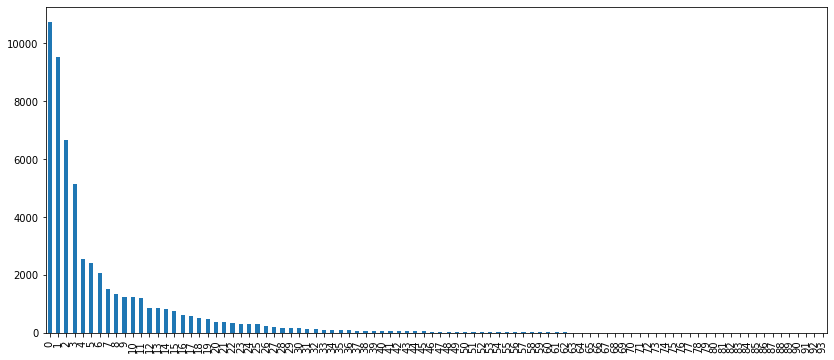

In [3]:
df_dropoff = pd.read_csv('/datasets/project_sql_result_04.csv')
display(df_dropoff.head(10))
print(df_dropoff['average_trips'].max())
print(df_dropoff['average_trips'].min())
print(df_dropoff['average_trips'].median())
print(df_dropoff['average_trips'].mean())
df_dropoff.info()
df_dropoff = df_dropoff.sort_values(by=['average_trips'],ascending=False)
df_dropoff.plot(kind='bar', rot=90, figsize=(14,6),legend=False)

The dataset 'df_dropoff' contains 2 columns, and the average is on float.
The same happens here, the average is much more higher than the median, meaning that few places are the most place people drive to. Only 4 places had more than 2500 dropoff.

In [4]:
print(df_companies['company_name'].unique())
print(df_companies['company_name'].value_counts())

['Flash Cab' 'Taxi Affiliation Services' 'Medallion Leasing' 'Yellow Cab'
 'Taxi Affiliation Service Yellow' 'Chicago Carriage Cab Corp'
 'City Service' 'Sun Taxi' 'Star North Management LLC'
 'Blue Ribbon Taxi Association Inc.' 'Choice Taxi Association'
 'Globe Taxi' 'Dispatch Taxi Affiliation' 'Nova Taxi Affiliation Llc'
 'Patriot Taxi Dba Peace Taxi Association' 'Checker Taxi Affiliation'
 'Blue Diamond' 'Chicago Medallion Management' '24 Seven Taxi'
 'Chicago Medallion Leasing INC' 'Checker Taxi' 'American United'
 'Chicago Independents' 'KOAM Taxi Association' 'Chicago Taxicab'
 'Top Cab Affiliation' 'Gold Coast Taxi' 'Service Taxi Association'
 '5 Star Taxi' '303 Taxi' 'Setare Inc' 'American United Taxi Affiliation'
 'Leonard Cab Co' 'Metro Jet Taxi A' 'Norshore Cab'
 '6742 - 83735 Tasha Ride Inc' '3591 - 63480 Chuks Cab'
 '1469 - 64126 Omar Jada' '6743 - 78771 Luhak Corp'
 '0118 - 42111 Godfrey S. Awir' '6574 - Babylon Express Inc.'
 'Chicago Star Taxicab' '1085 - 72312 N and W 

In [5]:
print(df_dropoff['dropoff_location_name'].unique())
print(df_dropoff['dropoff_location_name'].value_counts())

['Loop' 'River North' 'Streeterville' 'West Loop' "O'Hare" 'Lake View'
 'Grant Park' 'Museum Campus' 'Gold Coast' 'Sheffield & DePaul'
 'Lincoln Park' 'East Village' 'Little Italy, UIC' 'Uptown'
 'Near South Side' 'Garfield Ridge' 'Logan Square' 'Edgewater' 'West Town'
 'Old Town' 'Rush & Division' 'North Center' 'Lincoln Square'
 'Rogers Park' 'West Ridge' 'Irving Park' 'Hyde Park' 'Avondale'
 'Wicker Park' 'Albany Park' 'United Center' 'Lower West Side' 'Douglas'
 'Portage Park' 'Humboldt Park' 'Norwood Park' 'Kenwood' 'Bridgeport'
 'Armour Square' 'Jefferson Park' 'Bucktown' 'North Park' 'Garfield Park'
 'Mckinley Park' 'Belmont Cragin' 'Boystown' 'Chinatown' 'Grand Boulevard'
 'Austin' 'Sauganash,Forest Glen' 'South Shore' 'Woodlawn'
 'Little Village' 'Jackson Park' 'North Lawndale' 'Dunning'
 'Ukrainian Village' 'Hermosa' 'Englewood' 'Chatham' 'New City'
 'Grand Crossing' 'Brighton Park' 'Andersonville' 'Oakland' 'Ashburn'
 'Washington Park' 'Auburn Gresham' 'Clearing' 'Roseland' 

Names looking okay. No nulls found.

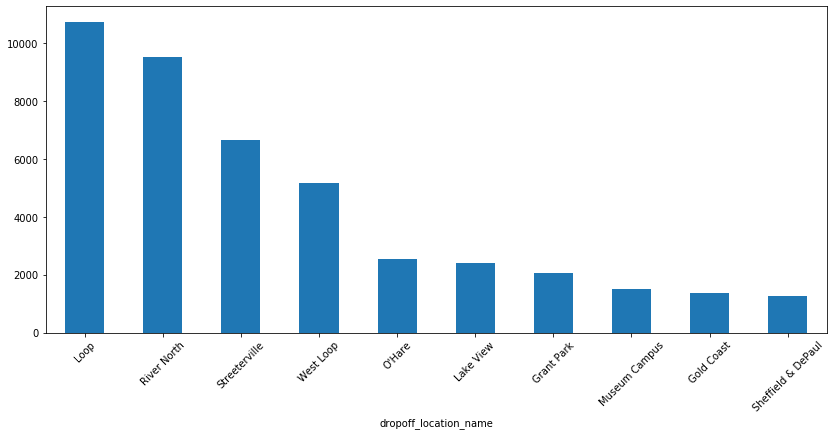

In [6]:
top_10 = df_dropoff.head(10)
top_10 = top_10.groupby(['dropoff_location_name']).agg({'average_trips':'sum'}).rename(columns={'dropoff_location_name':'average_trips'})
top_10 = top_10.sort_values(by=['average_trips'],ascending=False)
top_10.plot(kind='bar', rot=45, figsize=(14,6),legend=False)

Also from here we can see that only 4 places had more than 2500 dropoff and most of the dropoff where at the 'Loop', 'River North', 'Streeterville' & 'West Loop'.

In [7]:
df_loop_ohaire = pd.read_csv('/datasets/project_sql_result_07.csv')
display(df_loop_ohaire.head(10))
df_loop_ohaire['weather_conditions'].unique()

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0
5,2017-11-11 04:00:00,Good,1320.0
6,2017-11-04 16:00:00,Bad,2969.0
7,2017-11-18 11:00:00,Good,2280.0
8,2017-11-11 14:00:00,Good,2460.0
9,2017-11-11 12:00:00,Good,2040.0


array(['Good', 'Bad'], dtype=object)

In [8]:
def ttest_general(a,b):
    alpha = .05       # critical statistical significance level

    results = st.ttest_ind(a,b,equal_var=False)
    print('p-value: {:.10f}'.format(results.pvalue))

    if (results.pvalue<alpha):
        print("We reject the null hypothesis")
    else:
        print("We can't reject the null hypothesis")

In [9]:
ttest_good = df_loop_ohaire.query('weather_conditions == "Good"')['duration_seconds']
ttest_bad = df_loop_ohaire.query('weather_conditions == "Bad"')['duration_seconds']
print('The average of trip duration on seconds with good weather: {:.2f}.'.format(ttest_good.mean()))
print('The average of trip duration on seconds with bad weather: {:.2f}.'.format(ttest_bad.mean()))
ttest_general(ttest_good,ttest_bad)

The average of trip duration on seconds with good weather: 1999.68.
The average of trip duration on seconds with bad weather: 2427.21.
p-value: 0.0000000000
We reject the null hypothesis


For the test we will use confidence level of 0.05.

H0: The average are the same.
H1: The average are different.

Moreover, we don't know the distributions and their variance, thus, equal_variance = False.

We will test the hypothesis that both average of the duration drives are the same when the weather changes.

We found that there was a big change between  